In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dataset_path = "../data/raw/covid19-dataset/Covid Data.csv"
df = pd.read_csv(dataset_path)

# Initial exploration
print("Dataset shape:", df.shape)
print("\nColumns and Data Types:\n", df.dtypes)
print("\nFirst Few Rows:\n", df.head())

Dataset shape: (1048575, 21)

Columns and Data Types:
 USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

First Few Rows:
    USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2    

In [3]:
# Specify column types and map Boolean variables
bool_columns = ['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OTHER_DISEASE', 'OBESITY', 'TOBACCO', 
                'INTUBED', 'ICU']

missing_values=[97, 99]

# Convert Boolean columns to 'category' and map values
for col in bool_columns:
    df[col] = df[col].map({1: 'Yes', 2: 'No'})
    df[col] = df[col].astype('category')
df.replace({col: missing_values for col in bool_columns if col in df.columns}, pd.NA, inplace=True)

df['SEX'] = df['SEX'].map({1: 'female', 2: 'male'})
df.replace('SEX', pd.NA, inplace=True)
df['SEX'] = df['SEX'].astype('category')

df['PATIENT_TYPE'] = df['PATIENT_TYPE'].map({1: 'returned home', 2: 'hospitalization'})
df.replace('PATIENT_TYPE', pd.NA, inplace=True)
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].astype('category')

# DATE_DIED column missing value is '9999-99-99'
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'].replace('9999-99-99', pd.NA), errors='coerce')


print("\nColumns and Data Types:\n", df.dtypes)




Columns and Data Types:
 USMER                            int64
MEDICAL_UNIT                     int64
SEX                           category
PATIENT_TYPE                  category
DATE_DIED               datetime64[ns]
INTUBED                       category
PNEUMONIA                     category
AGE                              int64
PREGNANT                      category
DIABETES                      category
COPD                          category
ASTHMA                        category
INMSUPR                       category
HIPERTENSION                  category
OTHER_DISEASE                 category
CARDIOVASCULAR                category
OBESITY                       category
RENAL_CHRONIC                 category
TOBACCO                       category
CLASIFFICATION_FINAL             int64
ICU                           category
dtype: object


In [4]:
# Check for missing values
print("\nMissing Values Count:\n", df.isna().sum())


Missing Values Count:
 USMER                         0
MEDICAL_UNIT                  0
SEX                           0
PATIENT_TYPE                  0
DATE_DIED               1018083
INTUBED                  855869
PNEUMONIA                 16003
AGE                           0
PREGNANT                 527265
DIABETES                   3338
COPD                       3003
ASTHMA                     2979
INMSUPR                    3404
HIPERTENSION               3104
OTHER_DISEASE              5045
CARDIOVASCULAR             3076
OBESITY                    3032
RENAL_CHRONIC              3006
TOBACCO                    3220
CLASIFFICATION_FINAL          0
ICU                      856032
dtype: int64


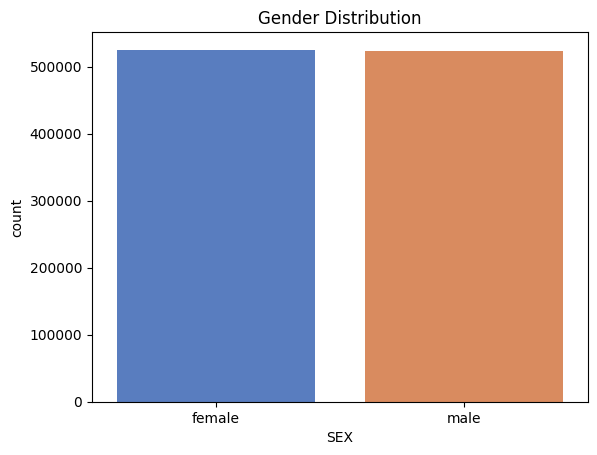

In [5]:
# Exploratory Data Analysis (EDA)
# Gender Distribution
sns.countplot(data=df, x='SEX', hue='SEX', palette='muted', legend=False)
plt.title("Gender Distribution")
plt.show()

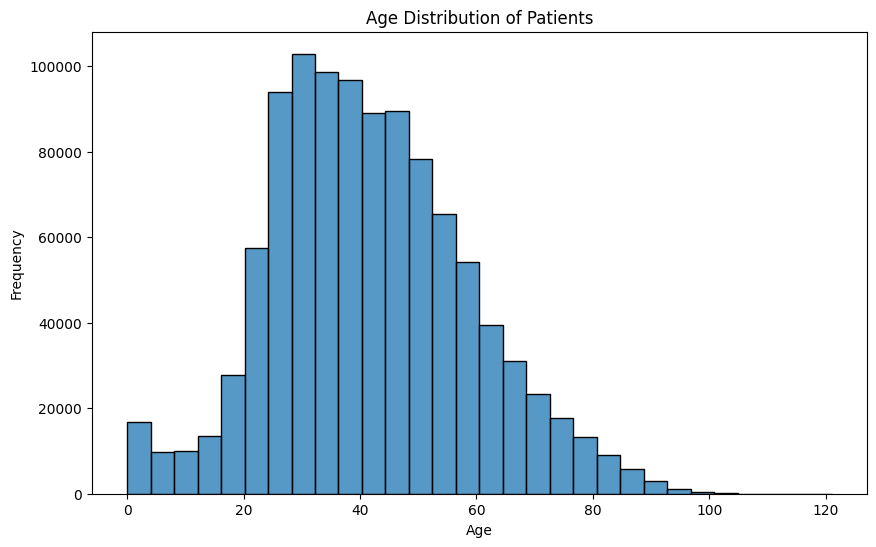

In [6]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, )
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

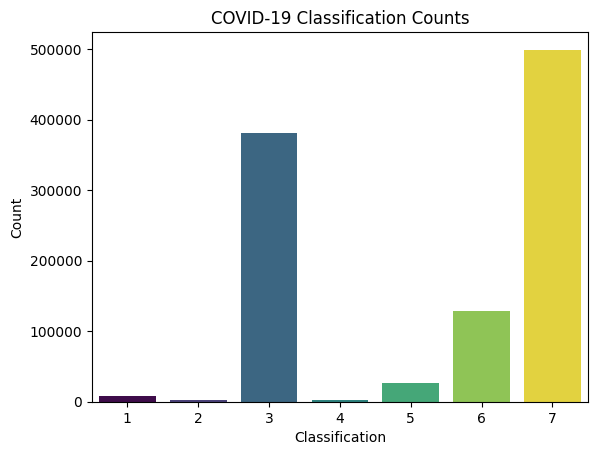

In [7]:
# Classification of COVID-19
sns.countplot(data=df, x='CLASIFFICATION_FINAL', hue='CLASIFFICATION_FINAL', palette='viridis', legend=False)
plt.title("COVID-19 Classification Counts")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.show()

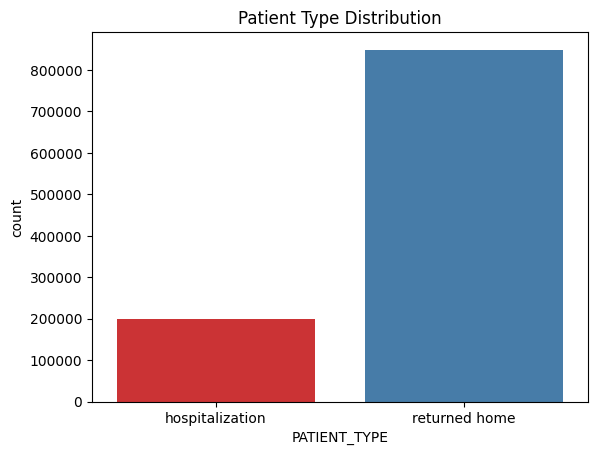

In [22]:
# Patient Type: Home vs Hospitalization
sns.countplot(data=df, x='PATIENT_TYPE', hue='PATIENT_TYPE', palette='Set1', legend=False)
plt.title("Patient Type Distribution")
plt.show()

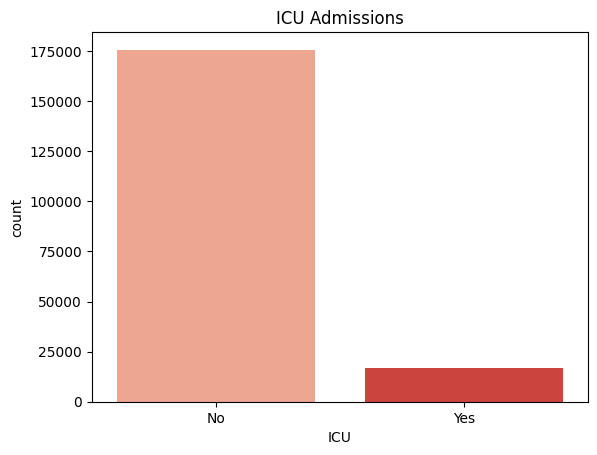

In [20]:
# ICU admissions and intubation
sns.countplot(data=df, x='ICU', hue='ICU', palette='Reds', legend=False)
plt.title("ICU Admissions")
plt.show()

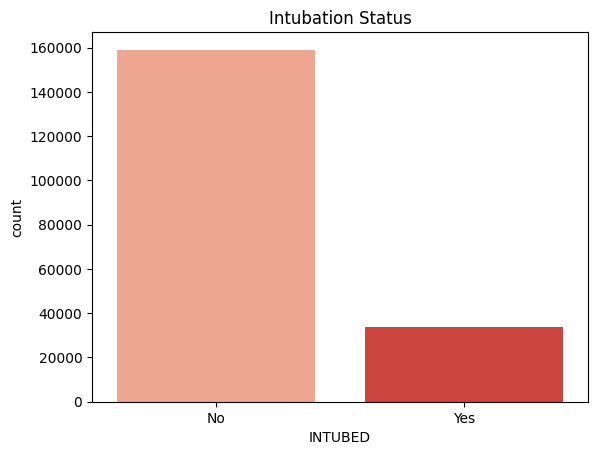

In [19]:
sns.countplot(data=df, x='INTUBED', hue='INTUBED', palette='Reds', legend=False)
plt.title("Intubation Status")
plt.show()

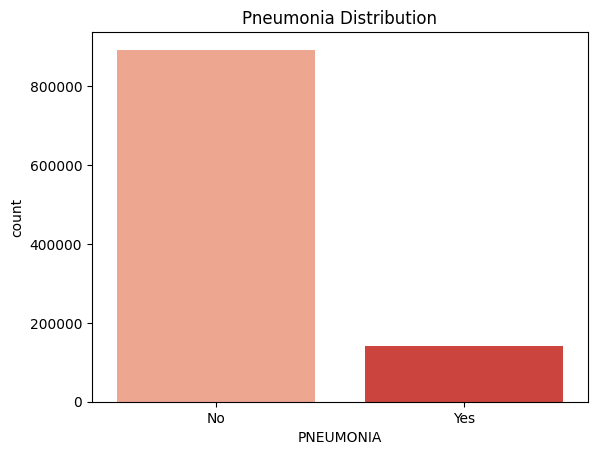

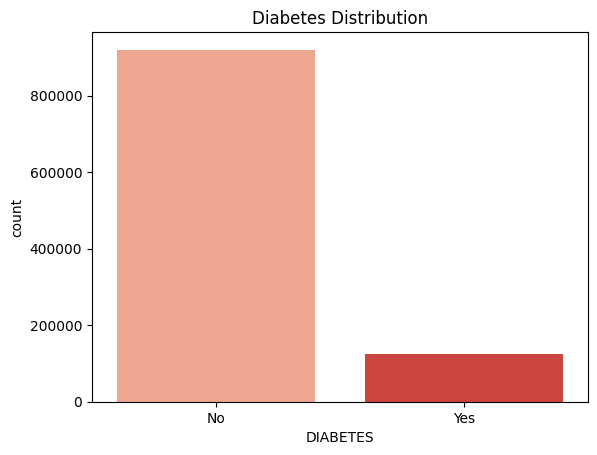

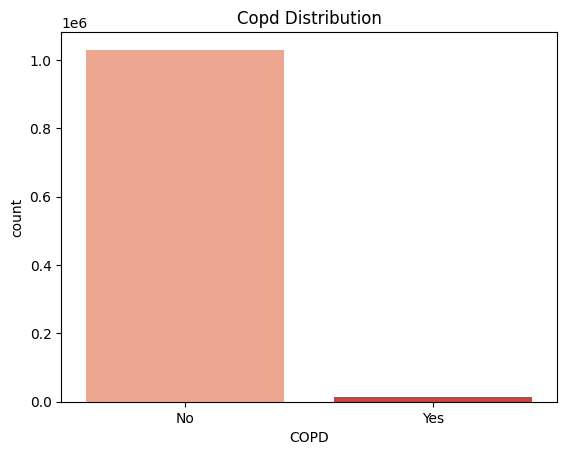

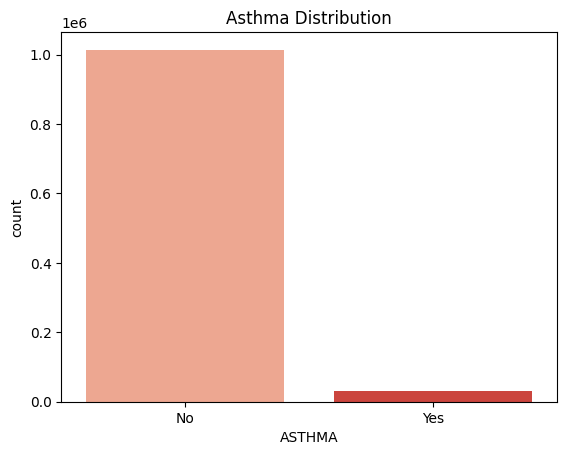

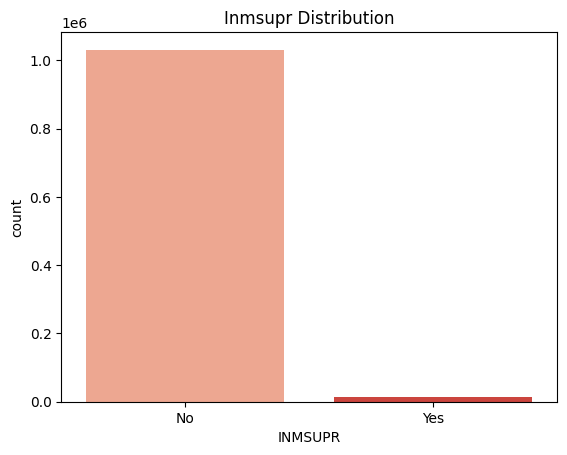

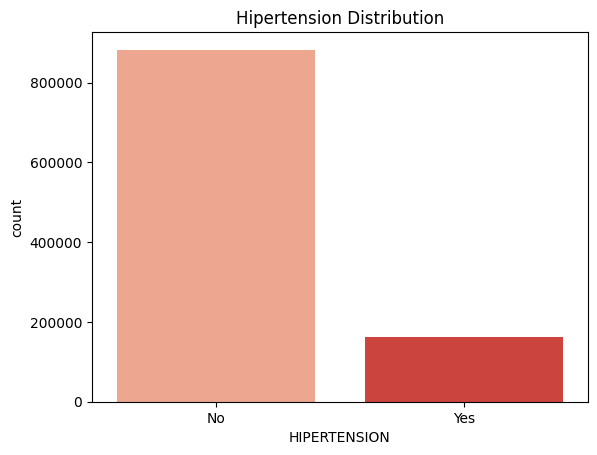

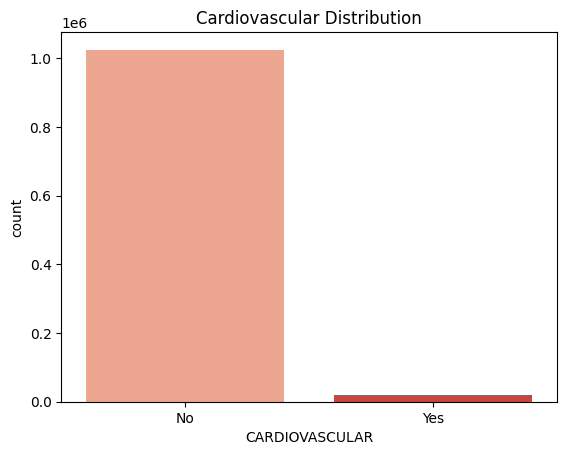

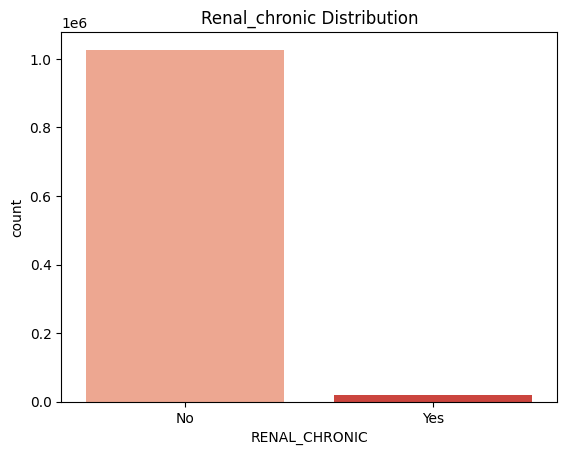

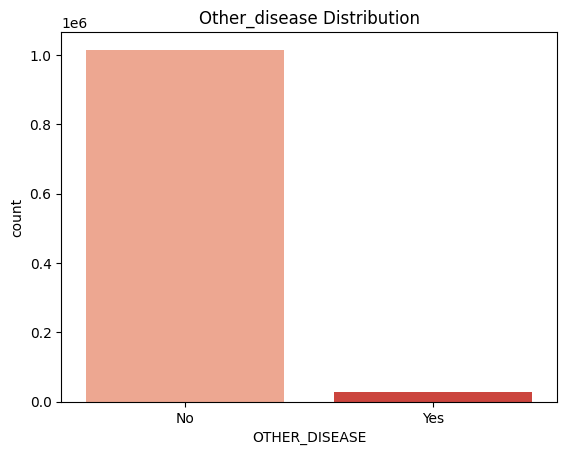

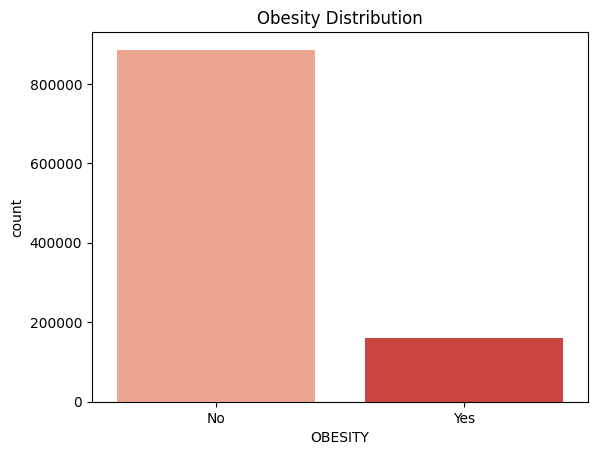

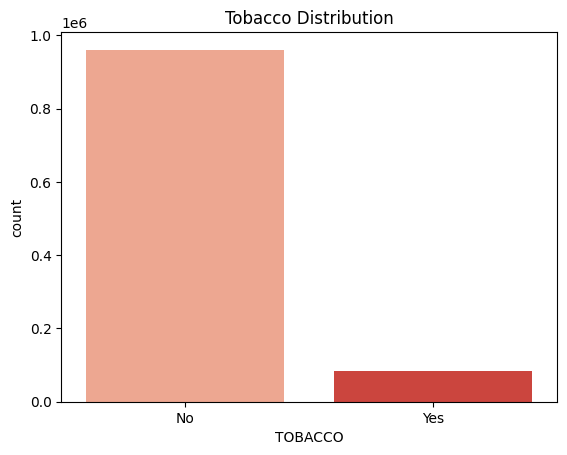

In [11]:
# Comorbidities Analysis
comorbidities = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OTHER_DISEASE', 'OBESITY', 'TOBACCO']
for condition in comorbidities:
    if condition in df.columns:
        sns.countplot(data=df, x=condition, hue=condition, palette='Reds', legend=False)
        plt.title(f"{condition.capitalize()} Distribution")
        plt.show()


Range of DATE_DIED column:
Earliest date: 2020-01-02 00:00:00
Latest date: 2021-12-04 00:00:00


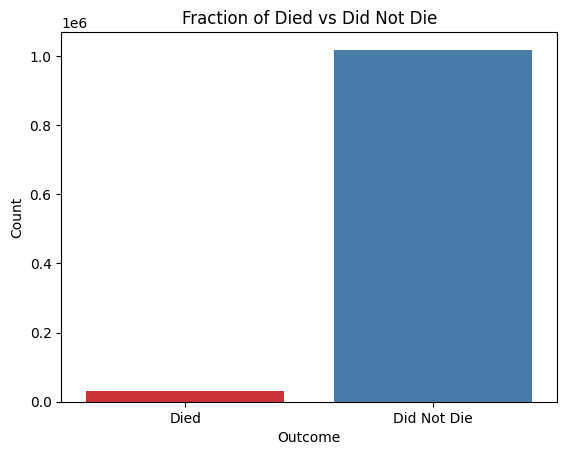

In [14]:
# Date Died Analysis
# Range of DATE_DIED column
date_died_min = df['DATE_DIED'].min()
date_died_max = df['DATE_DIED'].max()
print("\nRange of DATE_DIED column:")
print("Earliest date:", date_died_min)
print("Latest date:", date_died_max)

# Plot the fraction of died vs did not die
df['DIED'] = df['DATE_DIED'].notna().map({True: 'Died', False: 'Did Not Die'})
sns.countplot(data=df, x='DIED', palette='Set1', hue = 'DIED', legend=False)
plt.title("Fraction of Died vs Did Not Die")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()